In [5]:
import cv2 
import numpy as np
import glob
import pylab as plt
import os
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import data

In [2]:
os.chdir(r'C:\Users\kiran kumar\Documents\Python\Image_processing\10_Rupees')

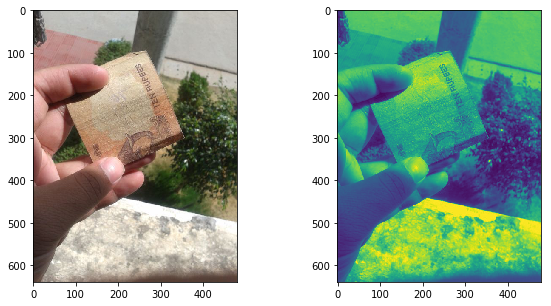

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(121)
image_10 = imread('10_Rupees20.jpg')
plt.imshow(image_10)

plt.subplot(122)
image_gray_10 = imread('10_Rupees20.jpg',as_gray=True)
plt.imshow(image_gray_10)

In [6]:

mask = np.zeros(image_gray_10.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(image_gray_10,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\grabcut.cpp:543: error: (-5:Bad argument) image must have CV_8UC3 type in function 'cv::grabCut'


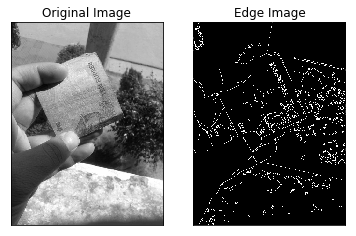

In [14]:
img = cv2.imread('10_Rupees20.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
a = cv2.resize(edges,(100,300))
a.shape

(300, 100)

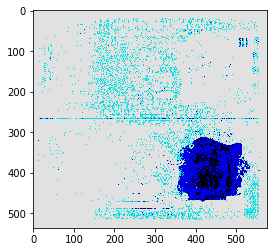

In [9]:
# create a binary thresholded image
_, binary = cv2.threshold(image_10, 225, 225, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [10]:
# show the image with the drawn contours
plt.imshow(new_image)
plt.show()

NameError: name 'new_image' is not defined

In [14]:
import cv2
import numpy as np


img = cv2.imread('10_Rupees1.jpg', cv2.IMREAD_UNCHANGED)

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh,255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
#img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image
#cv2.imwrite('10_Rupess1.jpg',img_contours) 

ValueError: too many values to unpack (expected 2)

In [12]:
plt.imshow(img_contours)

NameError: name 'img_contours' is not defined

In [2]:
#cv2.__version__


'3.4.2'

In [3]:
import cv2
import numpy as np

img = cv2.imread('Others1.jpg')
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp = sift.detect(img,None)

img=cv2.drawKeypoints(img,kp)

#cv2.imwrite('sift_keypoints.jpg',img)


AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

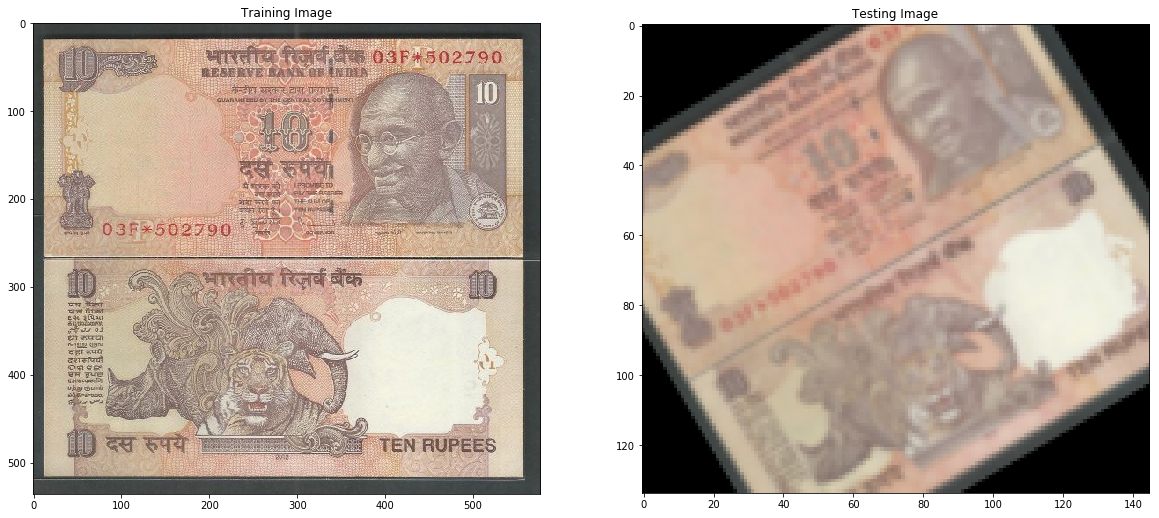

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('10_Rupees1.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  1911
Number of Keypoints Detected In The Query Image:  103


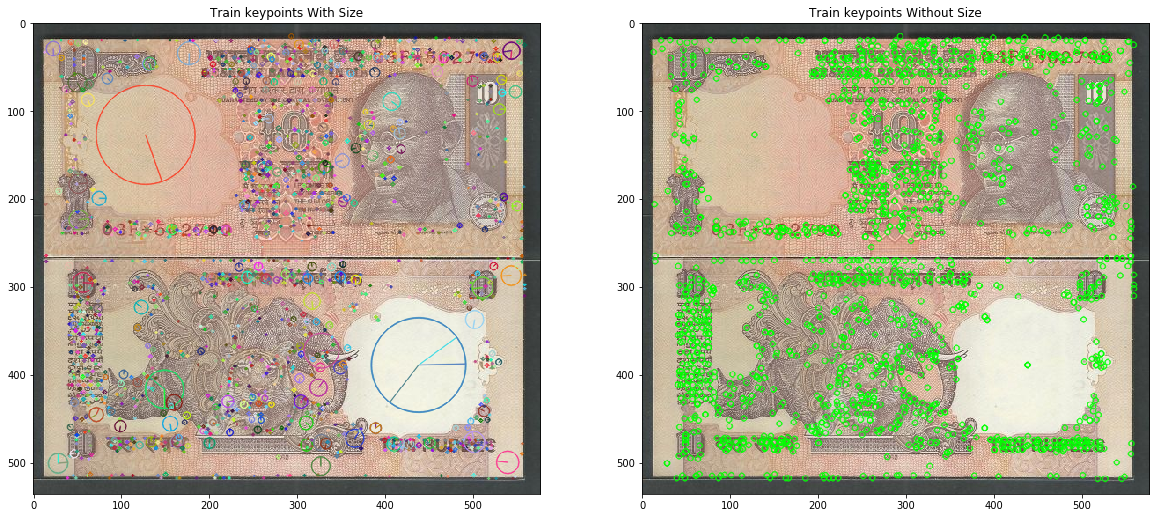

In [16]:
#Dtect keypoints and Create Descriptor


sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))


In [17]:
#keypoints_without_size

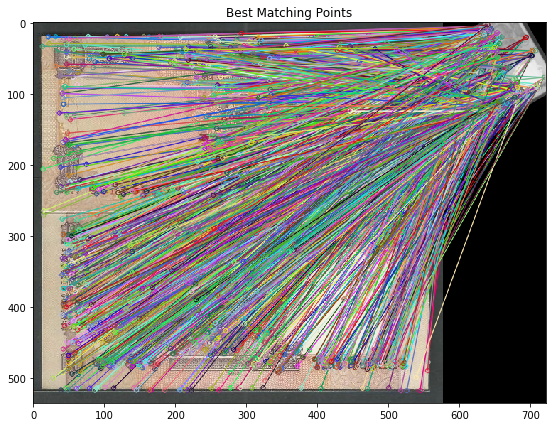


Number of Matching Keypoints Between The Training and Query Images:  1911


In [18]:



##tching Keypoints

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [24]:
import cv2
import numpy as np
import mapper
image=cv2.imread("10_Rupees5.jpg")   #read in the image
#image=cv2.resize(image,(1300,800)) #resizing because opencv does not work well with bigger images
image = cv2.resize(image,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#orig=image.copy()

gray=cv2.cvtColor(image,cv2.IMREAD_GRAYSCALE)  #RGB To Gray Scale
cv2.imshow("Title",gray)

blurred=cv2.GaussianBlur(gray,(5,5),0)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
cv2.imshow("Blur",blurred)

edged=cv2.Canny(blurred,30,50)  #30 MinThreshold and 50 is the MaxThreshold
cv2.imshow("Canny",edged)


image,contours,hierarchy=cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model
contours=sorted(contours,key=cv2.contourArea,reverse=True)

#the loop extracts the boundary contours of the page
for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)

    if len(approx)==4:
        target=approx
        break
approx=mapper.mapp(target) #find endpoints of the sheet

pts=np.float32([[0,0],[800,0],[800,800],[0,800]])  #map to 800*800 target window

op=cv2.getPerspectiveTransform(approx,pts)  #get the top or bird eye view effect
dst=cv2.warpPerspective(orig,op,(800,800))


cv2.imshow("Scanned",dst)

    
        


AttributeError: module 'mapper' has no attribute 'mapp'

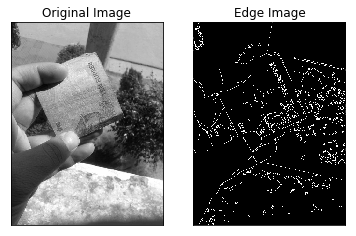

In [15]:
img = cv2.imread('10_Rupees20.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [16]:
im = cv2.imread('10_Rupees20.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

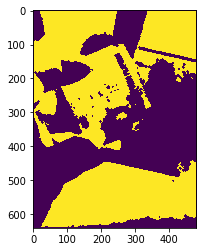

In [17]:
img = cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(img)

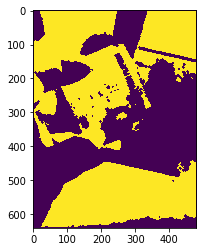

In [18]:
img = cv2.drawContours(img, contours, 3, (0,255,0), 3)
plt.imshow(img)

In [22]:
cnt = contours[4]
img = cv2.drawContours(img, 0, 255, 3)

SystemError: <built-in function drawContours> returned NULL without setting an error

Contour Approximation Method
This is the third argument in cv.findContours function. What does it denote actually?

Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with cv.CHAIN_APPROX_NONE (734 points) and second image shows the one with cv.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!!



In [1]:
import cv2
image = cv2.imread("10_Rupees20.jpg")
edged = cv2.Canny(image, 10, 250)
cv2.imshow("Edges", edged)
cv2.waitKey(0)
#applying closing function 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imshow("Closed", closed)
cv2.waitKey(0)
#finding_contours 
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
cv2.imshow("Output", ima0ge)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
